<a href="https://colab.research.google.com/github/StellaIbeh/Diabetes_Prediction_Mode-/blob/main/Adaobi_Stella_Ibeh_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summative Assignment_ Diabetes Prediction Model



This project aims to explore the implementation of Machine Learning Models with regularization, optimization, and Error analysis techniques used in machine learning to improve models' performance, convergence speed, and efficiency for the predicction of heart diseases.
Some of the concepts to be covered here are:

Data Exploration
Data cleaning, handling, and preprocessing
Standarization
Spliting
vanilla Model
Error analysis on Vanilla Model
Evaluation of vanilla model
Optimized model(with atleast 3 optimization techniques)
Error Analysis on Optimized Model
Evaluation of optimized Model
Summarry and discussions of results

In [ ]:
#Necessary Installation
!pip install tensorflow
!pip install keras

In [ ]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout


Mount Drive

In [ ]:
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Exploration


In [ ]:
#load Dataset From Drive
data=pd.read_csv('/content/drive/MyDrive/summative_diabetes/diabetes.csv')

In [ ]:
#Print the first 10 rows of the data
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#describe data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#Check the shape of the data
data.shape

(768, 9)

In [ ]:
# check the correlation
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


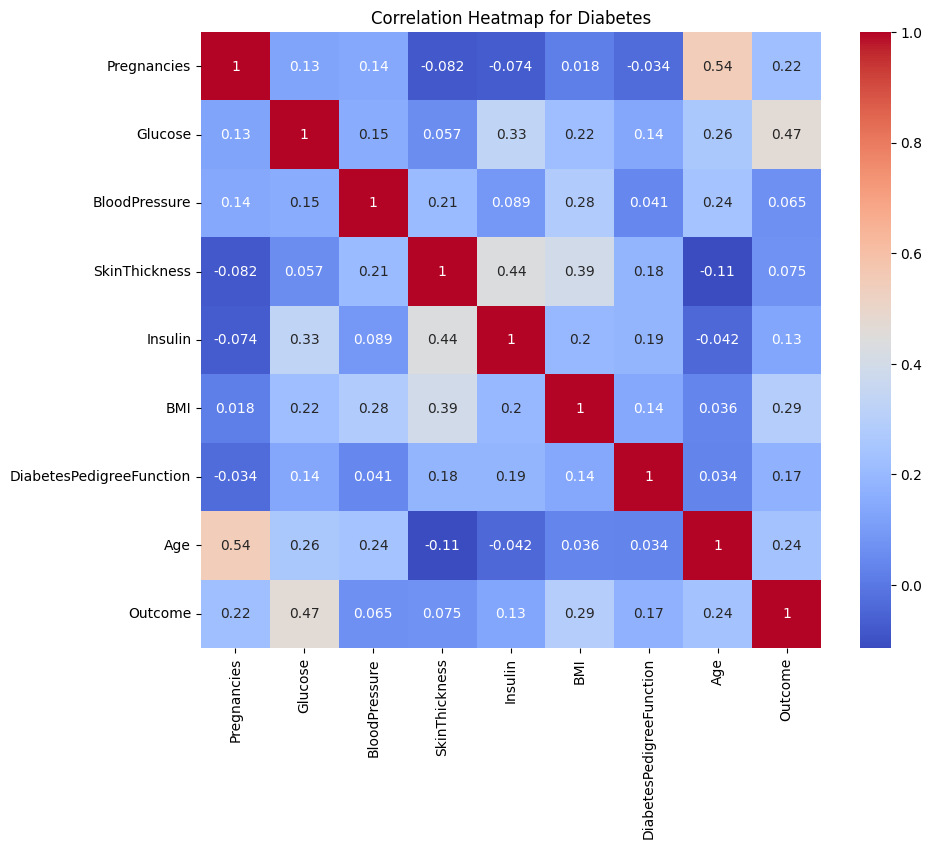

In [ ]:
#plot Correlation Heatmap for data set
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Diabetes')
plt.show()

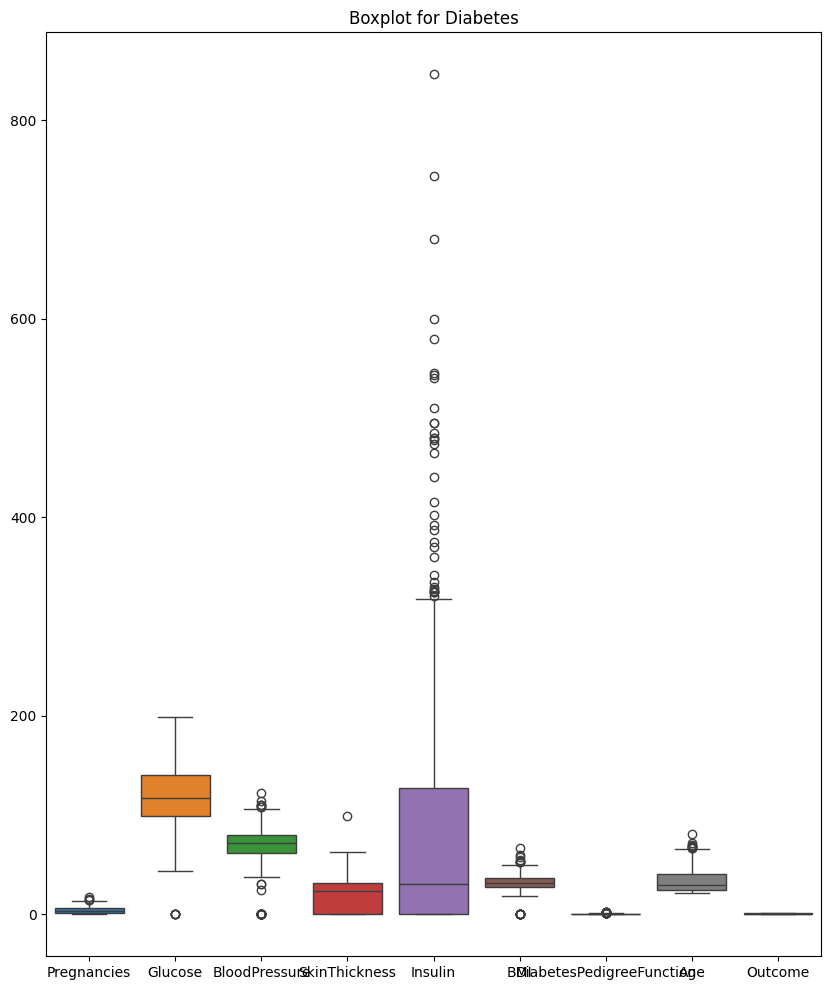

In [ ]:
# plot for outliers
plt.figure(figsize=(10,12))
sns.boxplot(data=data)
plt.title('Boxplot for Diabetes')
plt.show()

Data Handling and Preprocessing


In [ ]:
X= data.drop('Outcome', axis=1)
y= data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Standardize data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)






In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

Train a Simple ML Model without an Optimization Techniques- Vanilla Model


In [ ]:
#Clear previous session
tf.keras.backend.clear_session()

#Constructing the Vanilla Model using Sequential
#defining the model
vanilla_model=Sequential()
#Input Layer
vanilla_model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))

#First Hidden Layer
vanilla_model.add(Dense(32,activation='relu'))

#Second Hidden Layer
vanilla_model.add(Dense(32,activation='relu'))

#Output Layer
vanilla_model.add(Dense(1,activation='sigmoid'))

#Compile with a simple SDG
vanilla_model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

#Vanilla Model summary
vanilla_model.summary()

# Fit the Model
vanilla_model.fit(X_train,y_train,epochs=200,batch_size=32,validation_data=(X_test,y_test))

#Save the Model
vanilla_model.save('/content/drive/MyDrive/summative_diabetes.h5')



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,745 (14.63 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5778 - loss: 0.6904 - val_accuracy: 0.6429 - val_loss: 0.6833
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6378 - loss: 0.6821 - val_accuracy: 0.6429 - val_loss: 0.6764
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6496 - loss: 0.6727 - val_accuracy: 0.6429 - val_loss: 0.6715
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6444 - loss: 0.6698 - val_accuracy: 0.6429 - val_loss: 0.6679
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 0.6670 - val_accuracy: 0.6429 - val_loss: 0.6651
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6460 - loss: 0.6617 - val_accuracy: 0.6429 - val_loss: 0.6630
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6720 - loss: 0.6493 - val_accuracy: 0.6429 - val_loss: 0.6614
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6456 - loss: 0.6584 - val_accuracy: 0.6429 - 

Evaluating the Vanilla Model


In [ ]:
#Evaluate the Model
test_loss, test_accuracy=vanilla_model.evaluate(X_test,y_test)
print(f"Test Loss: {test_loss}\n, Test Accuracy: {test_accuracy}")

#Make Predictions on the test set
y_pred=vanilla_model.predict(X_test)

# Convert Probabilities to Binary Predictions
y_pred=(y_pred>0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6886 - loss: 0.5286 
Test Loss: 0.5059487223625183
, Test Accuracy: 0.7272727489471436
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Error Analysis for Vanilla Model
